<a href="https://colab.research.google.com/github/airctic/icevision/blob/master/notebooks/getting_started_object_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Object Detection using IceVision
by : Hamka Satria

## 0. Settings

#### Install IceVision and IceData

In [ ]:
# # Torch - Torchvision - IceVision - IceData - MMDetection - YOLOv5 - EfficientDet Installation
!wget https://raw.githubusercontent.com/airctic/icevision/master/icevision_install.sh

# # Choose your installation target: cuda11 or cuda10 or cpu
!bash icevision_install.sh cuda11 master

--2023-01-21 14:38:40--  https://raw.githubusercontent.com/airctic/icevision/master/icevision_install.sh
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2820 (2.8K) [text/plain]
Saving to: ‘icevision_install.sh’

icevision_install.s 100%[===================>]   2.75K  --.-KB/s    in 0s      

2023-01-21 14:38:41 (25.9 MB/s) - ‘icevision_install.sh’ saved [2820/2820]

Installing icevision + dependencices for cuda11
- Installing torch and its dependencies
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in links: https://download.pytorch.org/whl/torch_stable.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 2.1/2.1 GB 37.5 MB/s eta 0:00:01tcmalloc: large alloc 2137636864 bytes == 0x2888000 @  0x7f13c38

In [ ]:
# Restart kernel after installation
import IPython
IPython.Application.instance().kernel.do_shutdown(True)

{'status': 'ok', 'restart': True}

#### imports all dependency

In [ ]:
from icevision.all import *
from pytorch_lightning.loggers import WandbLogger
from pytorch_lightning import Trainer

# logger
!pip install wandb
# from fastai.callback.wandb import *
# from fastai.callback.tracker import SaveModelCallback

INFO     - Downloading default `.ttf` font file - SpaceGrotesk-Medium.ttf from https://raw.githubusercontent.com/airctic/storage/master/SpaceGrotesk-Medium.ttf to /root/.icevision/fonts/SpaceGrotesk-Medium.ttf | icevision.visualize.utils:get_default_font:67
INFO     - Downloading mmdet configs | icevision.models.mmdet.download_configs:download_mmdet_configs:31


  0%|          | 0/1837152 [00:00<?, ?B/s]

INFO     - Downloading mmseg configs | icevision.models.mmseg.download_configs:download_mmseg_configs:33


0B [00:00, ?B/s]

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# drive
from google.colab import drive

## 1. Connection

#### Drive

In [ ]:
drive.mount('/content/drive')
data_dir = "/content"
!unzip '/content/drive/MyDrive/sibi_lexicon_assets/sibi_voc_d1.zip' -d "/content"

Streaming output truncated to the last 5000 lines.
  inflating: /content/sibi_voc_d1/train/images/A13_jpg.rf.008acb42f63cdff14f4e176d60ca5976.jpg  
  inflating: /content/sibi_voc_d1/train/images/A13_jpg.rf.1c535e1330462277591c46ebfa249fa0.jpg  
  inflating: /content/sibi_voc_d1/train/images/A13_jpg.rf.4518d824d2660ccea89017f4bd0e8cef.jpg  
  inflating: /content/sibi_voc_d1/train/images/A13_jpg.rf.46af3defe747482db1d5198184318c22.jpg  
  inflating: /content/sibi_voc_d1/train/images/A13_jpg.rf.5bf42cd188fa5aa78a27b96bb6da04a1.jpg  
  inflating: /content/sibi_voc_d1/train/images/A13_jpg.rf.694beef03d5fa70a98721848d969c9cb.jpg  
  inflating: /content/sibi_voc_d1/train/images/A13_jpg.rf.981806930739c2c2b27d35350d6d26a6.jpg  
  inflating: /content/sibi_voc_d1/train/images/A13_jpg.rf.9a77442fe2e64cb804451d707deedb9f.jpg  
  inflating: /content/sibi_voc_d1/train/images/A13_jpg.rf.b11334d5495757e3c81432b0b8b67883.jpg  
  inflating: /content/sibi_voc_d1/train/images/A13_jpg.rf.d8c2809f0a888e57ac

#### Tracker

In [ ]:
!wandb login

wandb_logger = WandbLogger(project="sibi_lexicon_v2")

# trainer = Trainer(logger=wandb_logger)
# trainer.fit(model, datamodule)

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit: 
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


ERROR:wandb.jupyter:Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: Currently logged in as: hamkasatria. Use `wandb login --relogin` to force relogin


## Datasets

In [ ]:

# data_dir = icedata.load_data(url, dest_dir, gdrive= true)

In [ ]:
# Create the parser
data_dir = "/content"
parser = parsers.VOCBBoxParser(annotations_dir=data_dir+ "/sibi_voc_d1/train/annotations", images_dir=data_dir+ "/sibi_voc_d1/train/images")

# parser_valid = parsers.VOCBBoxParser(annotations_dir=data_dir+ "/sibi_voc_2/valid/annotations", images_dir=data_dir+ "/sibi_voc_2/valid/images")

In [ ]:
# Parse annotations to create records
train_records, valid_records = parser.parse()
# valid_records = parser_valid.parse()
parser.class_map

  0%|          | 0/5040 [00:00<?, ?it/s]

INFO     - Autofixing records | icevision.parsers.parser:parse:122


  0%|          | 0/5040 [00:00<?, ?it/s]

AUTOFIX-SUCCESS - (record_id: A26_jpg.rf.611fc482c9ff11df74d374d34332de24) - Clipping bbox xmax from 641 to image width 640 (Before: <BBox (xmin:164, ymin:127, xmax:641, ymax:640)>) | icevision.utils.logger_utils:autofix_log:17
AUTOFIX-SUCCESS - (record_id: A26_jpg.rf.eccbce3ade578c64ad4b5da7130abf6a) - Clipping bbox ymax from 641 to image height 640 (Before: <BBox (xmin:123, ymin:162, xmax:617, ymax:641)>) | icevision.utils.logger_utils:autofix_log:17
AUTOFIX-SUCCESS - (record_id: B18_jpg.rf.9ab9a9f81b3b28023a9f93ac382ca11c) - Clipping bbox ymax from 641 to image height 640 (Before: <BBox (xmin:17, ymin:1, xmax:640, ymax:641)>) | icevision.utils.logger_utils:autofix_log:17
AUTOFIX-SUCCESS - (record_id: B18_jpg.rf.ae09d34d7ee1c91405691c2b77247ae4) - Clipping bbox ymax from 641 to image height 640 (Before: <BBox (xmin:10, ymin:3, xmax:640, ymax:641)>) | icevision.utils.logger_utils:autofix_log:17
AUTOFIX-SUCCESS - (record_id: C11_jpg.rf.495d0bc05e0ac751fb4c0bd60f429859) - Clipping bbox 

<ClassMap: {'background': 0, 'A': 1, 'B': 2, 'C': 3, 'D': 4, 'E': 5, 'F': 6, 'G': 7, 'H': 8, 'I': 9, 'J': 10, 'K': 11, 'L': 12, 'M': 13, 'N': 14, 'O': 15, 'P': 16, 'Q': 17, 'R': 18, 'S': 19, 'T': 20, 'U': 21, 'V': 22, 'W': 23, 'X': 24, 'Y': 25, 'Z': 26}>

## Creating datasets with augmentations and transforms

Data augmentations are essential for robust training and results on many datasets and deep learning tasks. IceVision ships with the [Albumentations](https://albumentations.ai/docs/) library for defining and executing transformations, but can be extended to use others.

For this tutorial, we apply the Albumentation's default `aug_tfms` to the training set. `aug_tfms` randomly applies broadly useful transformations including rotation, cropping, horizontal flips, and more. See the Albumentations documentation to learn how to customize each transformation more fully.

The validation set is only resized (with padding).

We then create `Datasets` for both. The dataset applies the transforms to the annotations (such as bounding boxes) and images in the data records.

In [ ]:
# Transforms
# size is set to 384 because EfficientDet requires its inputs to be divisible by 128
image_size = 384
train_tfms = tfms.A.Adapter([*tfms.A.aug_tfms(size=image_size, presize=512), tfms.A.Normalize()])
valid_tfms = tfms.A.Adapter([*tfms.A.resize_and_pad(image_size), tfms.A.Normalize()])

In [ ]:
# Datasets
train_ds = Dataset(train_records, train_tfms)
valid_ds = Dataset(valid_records, valid_tfms)

### Understanding the transforms

The Dataset transforms are only applied when we grab (get) an item. Several of the default `aug_tfms` have a random element to them. For example, one might perform a rotation with probability 0.5 where the angle of rotation  is randomly selected between +45 and -45 degrees.

This means that the learner sees a slightly different version of an image each time it is accessed. This effectively increases the size of the dataset and improves learning.

We can look at result of getting the 0th image from the dataset a few times and see the differences. Each time you run the next cell, you will see different results due to the random element in applying transformations.

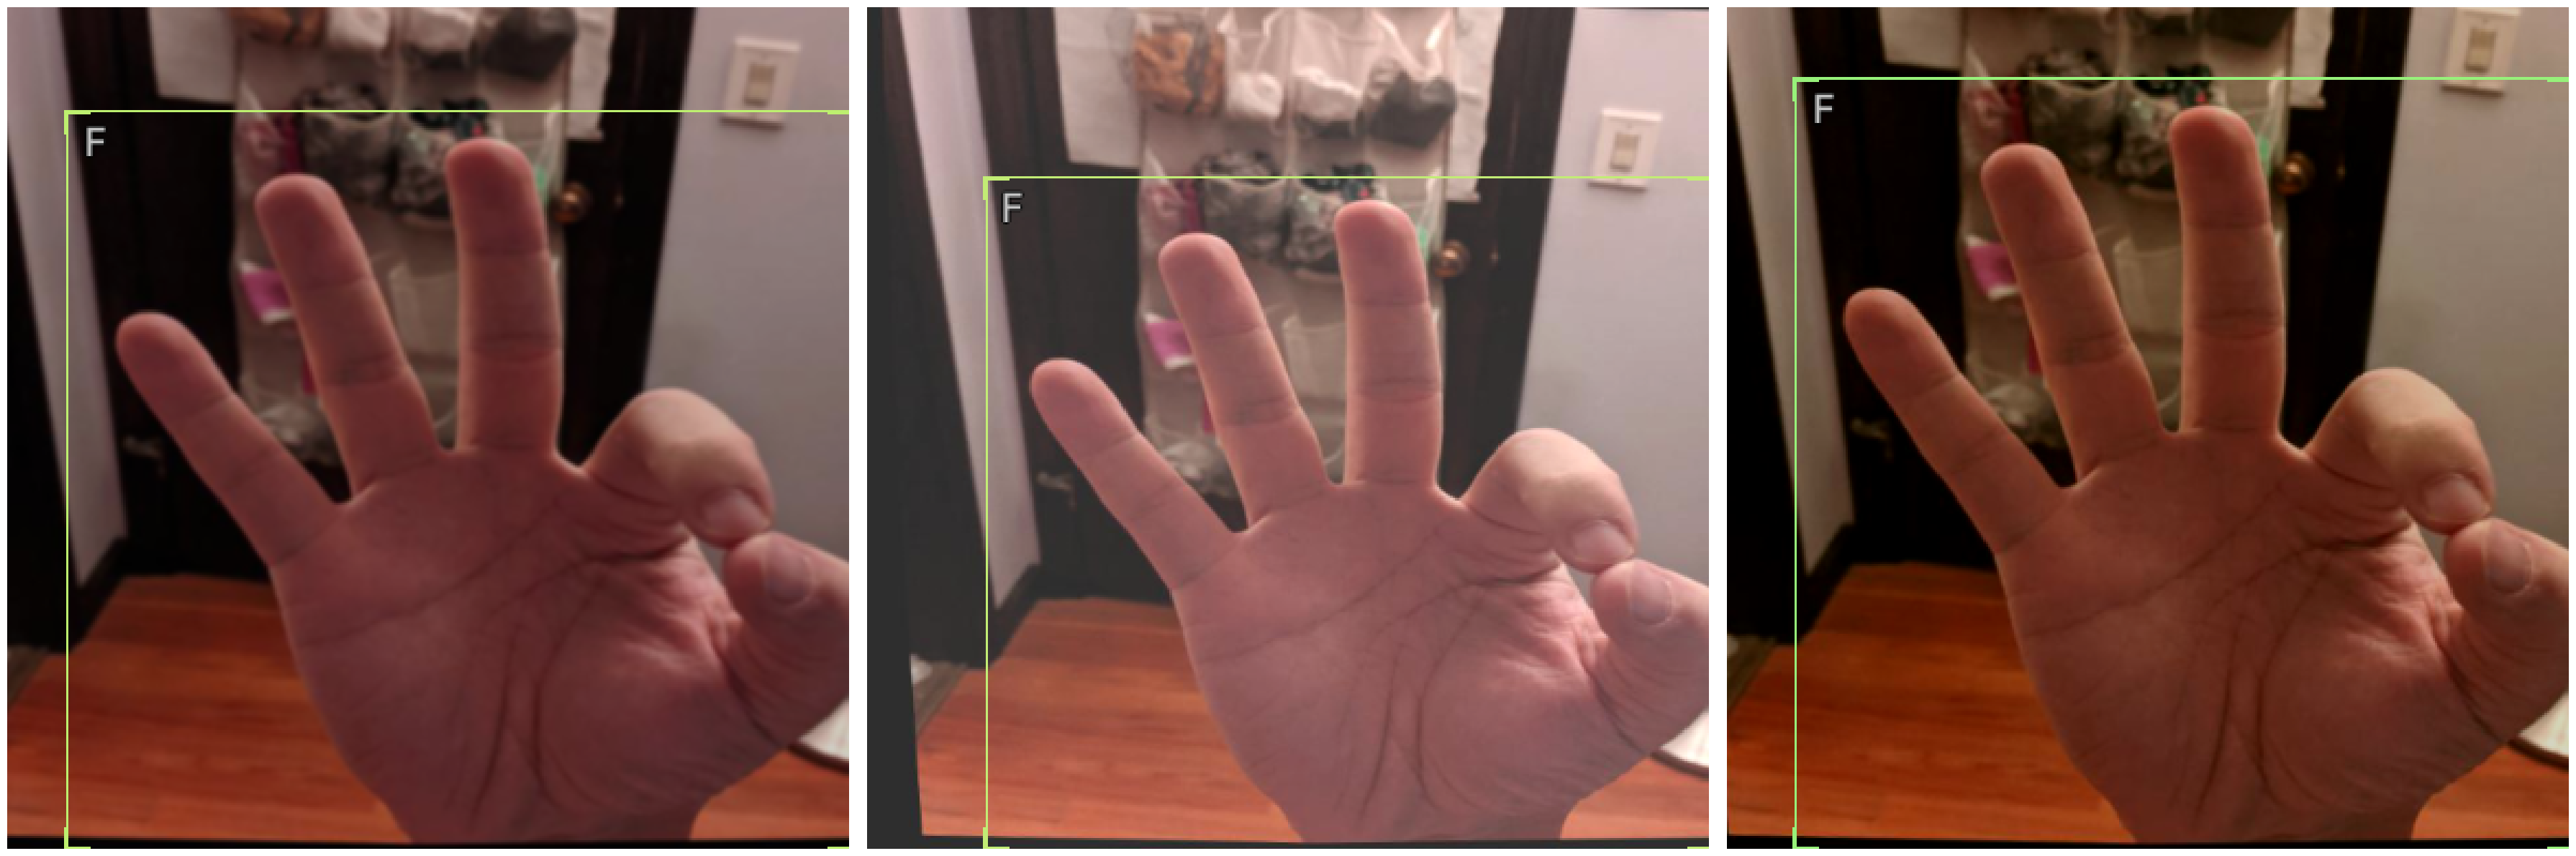

In [ ]:
# Show an element of the train_ds with augmentation transformations applied
samples = [train_ds[0] for _ in range(3)]
show_samples(samples, ncols=3)

## Select a library, model, and backbone

In order to create a model, we need to:
* Choose one of the **libraries** supported by IceVision
* Choose one of the **models** supported by the library
* Choose one of the **backbones** corresponding to a chosen model

You can access any supported models by following the IceVision unified API, use code completion to explore the available models for each library.



### Creating a model



In [ ]:
from datetime import datetime


In [ ]:
# Just change the value of selection to try another model

selection = 1

extra_args = {}

model_name = 'torchvision.faster_rcnn'
if selection == 0:
  backbone_name = "resnet_fpn_configs.resnet50_fpn"
  model_type = models.torchvision.faster_rcnn
  backbone = model_type.backbones.resnet_fpn_configs.resnet50_fpn

if selection == 1:
  backbone_name = "resnet_fpn_configs.resnet18_fpn"
  model_type = models.torchvision.faster_rcnn
  backbone = model_type.backbones.resnet_fpn_configs.resnet18_fpn

if selection == 2:
  backbone_name = "ResNet-101"
  model_type = models.mmdet.faster_rcnn
  backbone = model_type.backbones.resnet101_fpn_2x
  # extra_args['cfg_options'] = { 
  #   'model.roi_head.bbox_head.loss_bbox.loss_weight': 2,
  #   'model.roi_head.bbox_head.loss_cls.loss_weight': 0.8,
  #    }


model_type, backbone, extra_args

(<module 'icevision.models.torchvision.faster_rcnn' from '/usr/local/lib/python3.8/dist-packages/icevision/models/torchvision/faster_rcnn/__init__.py'>,
 {})

In [ ]:
backbone.__dict__

{'model_name': 'faster_rcnn',
 'backbone_fn': <function icevision.models.torchvision.faster_rcnn.backbones.resnet_fpn_configs.resnet18_fpn_fn(pretrained: bool = True, **kwargs)>,
 'backbone_fn_kwargs': {}}


Now it is just a one-liner to instantiate the model. If you want to try another *option*, just edit the line at the top of the previous cell.

In [ ]:
# Instantiate the model
model = model_type.model(backbone=backbone(pretrained=True), num_classes=len(parser.class_map), **extra_args) 

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


  0%|          | 0.00/44.7M [00:00<?, ?B/s]

## Data Loader

The Data Loader is specific to a model_type. The job of the data loader is to get items from a dataset and batch them up in the specific format required by each model. This is why creating the data loaders is separated from creating the datasets.

We can take a look at the first batch of items from the `valid_dl`. Remember that the `valid_tfms` only resized (with padding) and normalized records, so different images, for example, are not returned each time. This is important to provide consistent validation during training.

In [ ]:
# Data Loaders
train_dl = model_type.train_dl(train_ds, batch_size=8, num_workers=4, shuffle=True)
valid_dl = model_type.valid_dl(valid_ds, batch_size=8, num_workers=4, shuffle=False)

/usr/local/lib/python3.8/dist-packages/torch/utils/data/dataloader.py:478: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


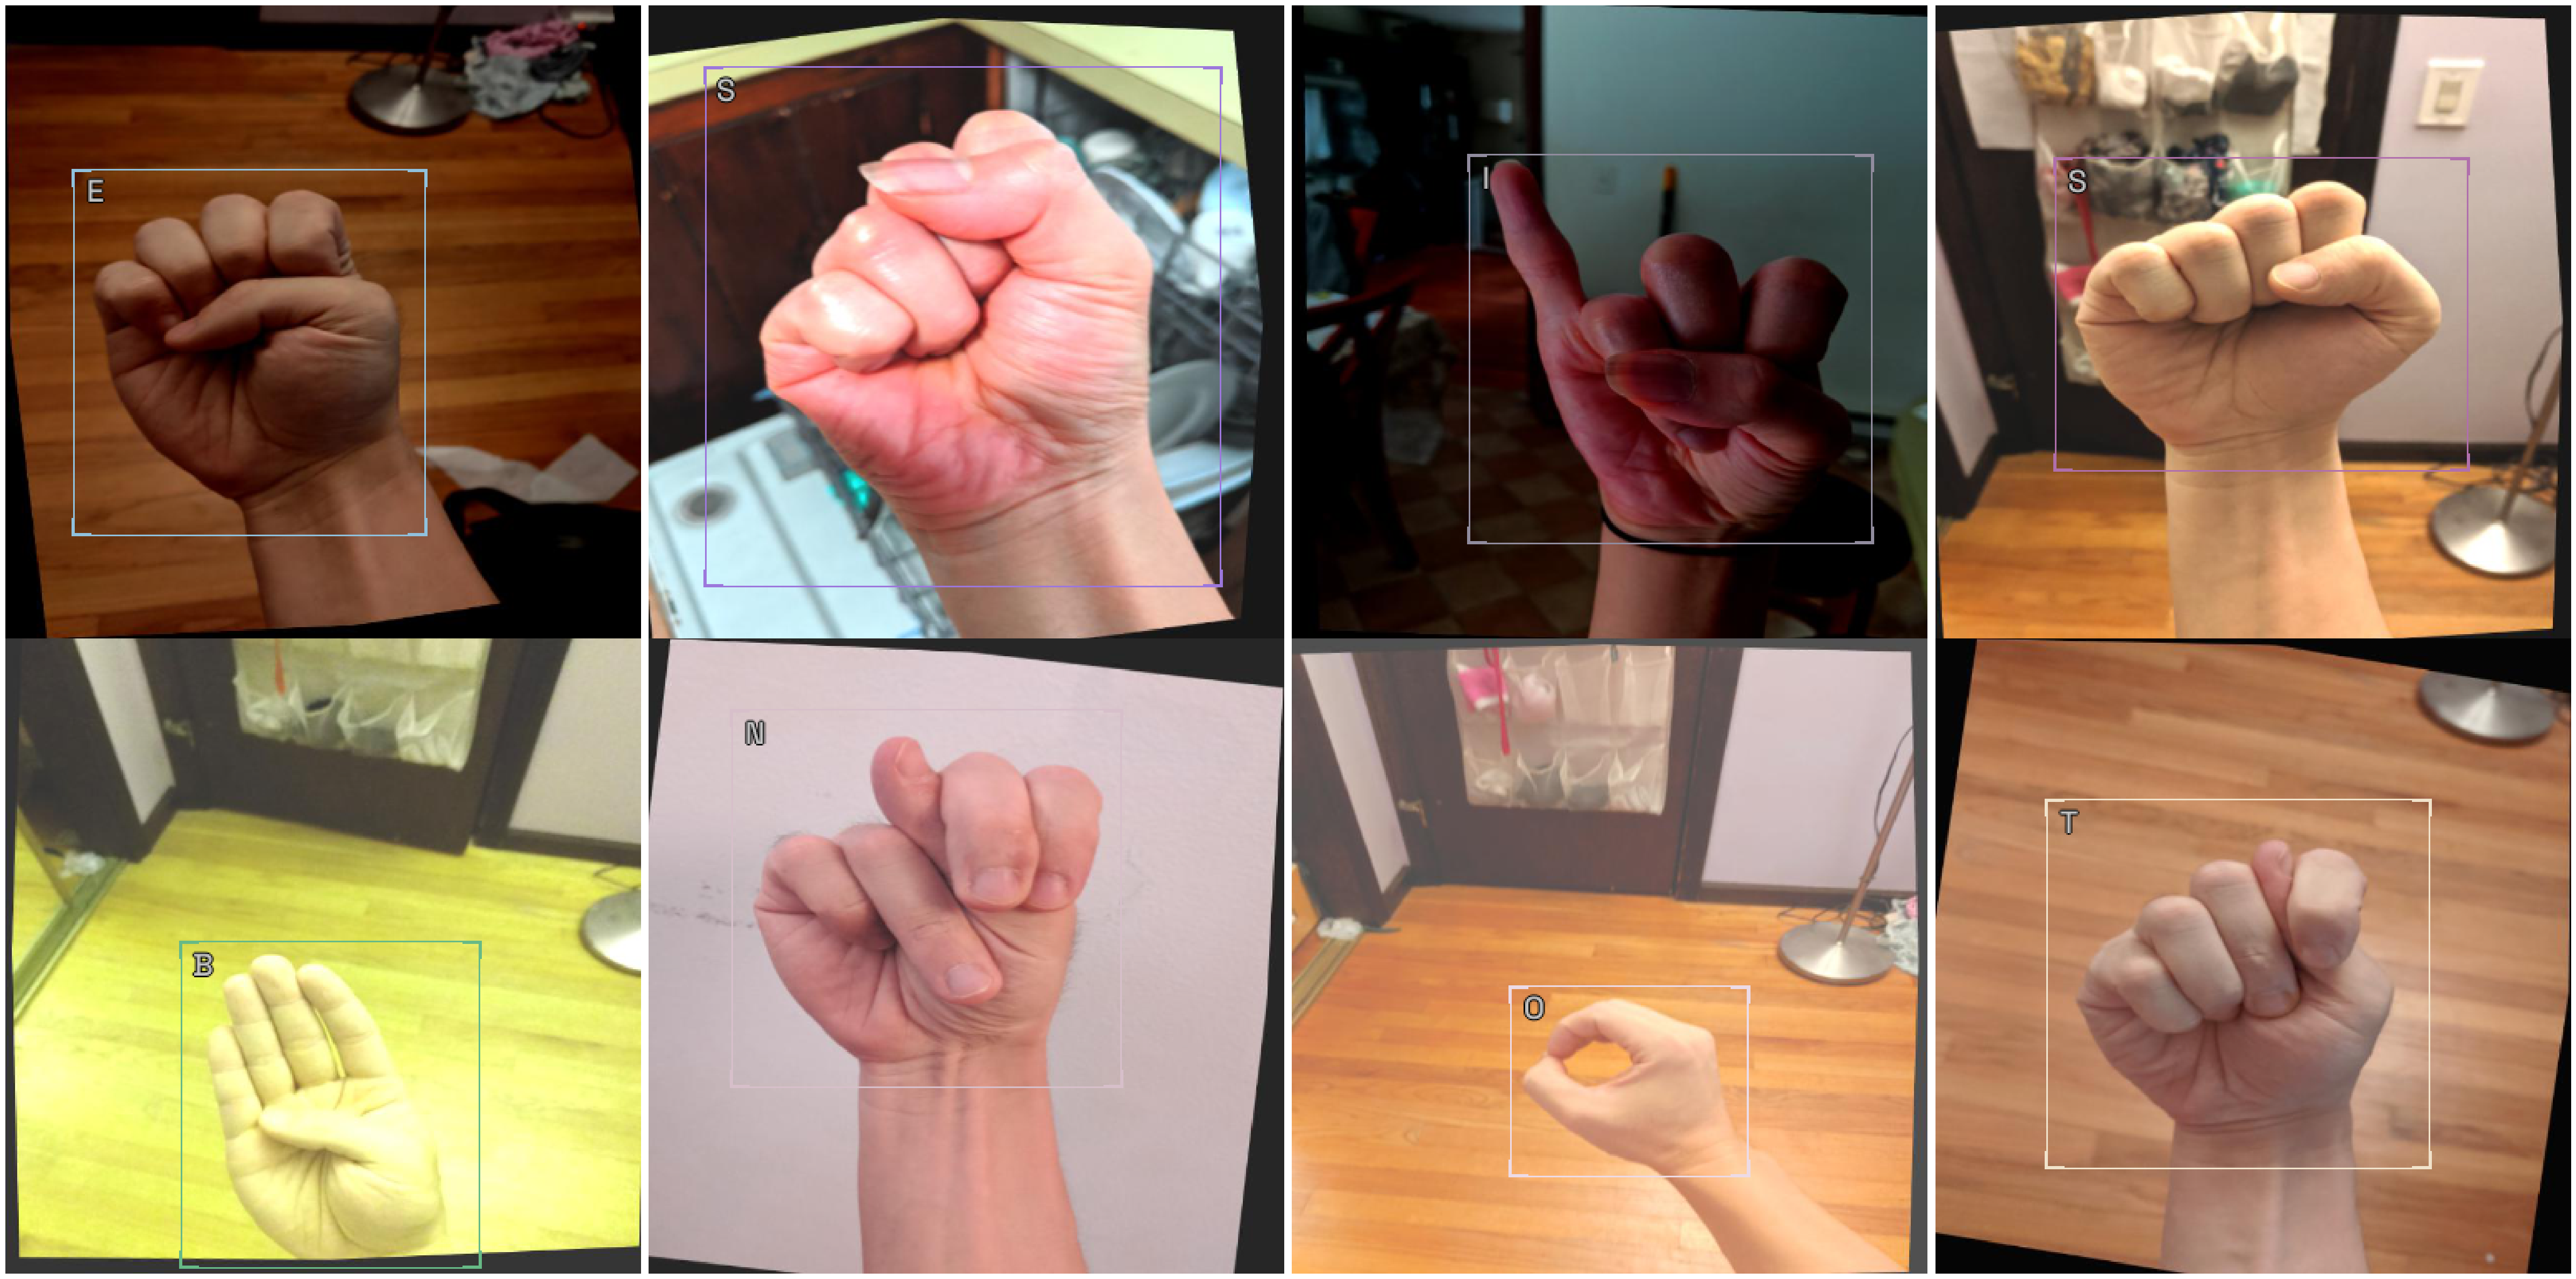

In [ ]:
# show batch
model_type.show_batch(first(valid_dl), ncols=4)

## Metrics

The fastai and pytorch lightning engines collect metrics to track progress during training. IceVision provides metric classes that work across the engines and libraries.

The same metrics can be used for both fastai and pytorch lightning.

In [ ]:
# fiks package matrics
# source : https://colab.research.google.com/drive/10NOSJpFQHAtEmMGZ_RHZiKki2cz4eTVw?usp=sharing#scrollTo=dJqV2cJGyRcr

from icevision.imports import *
from icevision.utils import *
from icevision.data import *
from icevision.metrics.metric import *


class COCOMetricType(Enum):
    """Available options for `COCOMetric`."""

    bbox = "bbox"
    mask = "segm"
    keypoint = "keypoints"


class COCOMetric(Metric):
    """Wrapper around [cocoapi evaluator](https://github.com/cocodataset/cocoapi)
    Calculates average precision.
    # Arguments
        metric_type: Dependent on the task you're solving.
        print_summary: If `True`, prints a table with statistics.
        show_pbar: If `True` shows pbar when preparing the data for evaluation.
    """

    def __init__(
        self,
        metric_type: COCOMetricType = COCOMetricType.bbox,
        iou_thresholds: Optional[Sequence[float]] = None,
        print_summary: bool = False,
        show_pbar: bool = False,
    ):
        self.metric_type = metric_type
        self.iou_thresholds = iou_thresholds
        self.print_summary = print_summary
        self.show_pbar = show_pbar
        self._records, self._preds = [], []

    def _reset(self):
        self._records.clear()
        self._preds.clear()

    def accumulate(self, preds):
        for pred in preds:
            self._records.append(pred.ground_truth)
            self._preds.append(pred.pred)

    def finalize(self) -> Dict[str, float]:
        with CaptureStdout():
            coco_eval = create_coco_eval(
                records=self._records,
                preds=self._preds,
                metric_type=self.metric_type.value,
                iou_thresholds=self.iou_thresholds,
                show_pbar=self.show_pbar,
            )
            coco_eval.evaluate()
            coco_eval.accumulate()

        with CaptureStdout(propagate_stdout=self.print_summary):
            coco_eval.summarize()

        stats = coco_eval.stats
        logs = {
            "AP (IoU=0.50:0.95) area=all": stats[0],
            "AP (IoU=0.50) area=all": stats[1],
            "AP (IoU=0.75) area=all": stats[2],
            "AP (IoU=0.50:0.95) area=small": stats[3],
            "AP (IoU=0.50:0.95) area=medium": stats[4],
            "AP (IoU=0.50:0.95) area=large": stats[5],
            "AR (IoU=0.50:0.95) area=all maxDets=1": stats[6],
            "AR (IoU=0.50:0.95) area=all maxDets=10": stats[7],
            "AR (IoU=0.50:0.95) area=all maxDets=100": stats[8],
            "AR (IoU=0.50:0.95) area=small maxDets=100": stats[9],
            "AR (IoU=0.50:0.95) area=medium maxDets=100": stats[10],
            "AR (IoU=0.50:0.95) area=large maxDets=100": stats[11],
        }

        self._reset()
        return logs

In [ ]:
metrics = [COCOMetric(metric_type=COCOMetricType.bbox)]

## Training

IceVision is an agnostic framework meaning it can be plugged into other DL learning engines such as [fastai2](https://github.com/fastai/fastai2), and [pytorch-lightning](https://github.com/PyTorchLightning/pytorch-lightning).  


In [ ]:
# # train with fast ai
# learn = model_type.fastai.learner(dls=[train_dl, valid_dl], model=model,
#                                        cbs=[WandbCallback(log_dataset=True, log_model=True), SaveModelCallback()])

# # learn.fine_tune(50, 1e-2, freeze_epochs=5)
# learn.lr_find(end_lr=0.005)
# learn.fine_tune(20, 0.00158, freeze_epochs=1)

### Training using Pytorch Lightning

In [ ]:
class LightModel(model_type.lightning.ModelAdapter):
    def configure_optimizers(self):
      # 1e-4 = 0.00001
        return Adam(self.parameters(), lr=1e-4)# 0,05 0,005

light_model = LightModel(model, metrics=metrics)

# light_model = LightModel(model)

trainer = pl.Trainer(logger=wandb_logger,max_epochs=100, gpus=1)
trainer.fit(light_model, train_dl, valid_dl)

# trainer.validate(light_model, valid_dl)

/usr/local/lib/python3.8/dist-packages/pytorch_lightning/trainer/connectors/accelerator_connector.py:467: LightningDeprecationWarning: Setting `Trainer(gpus=1)` is deprecated in v1.7 and will be removed in v2.0. Please use `Trainer(accelerator='gpu', devices=1)` instead.
  rank_zero_deprecation(
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name  | Type       | Params
-------------------------------------
0 | model | FasterRCNN | 28.4 M
-------------------------------------
28.2 M    Trainable params
156 K     Non-trainable params
28.4 M    Total params
113.608   Total estimated m

Sanity Checking: 0it [00:00, ?it/s]

/usr/local/lib/python3.8/dist-packages/torch/functional.py:445: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  ../aten/src/ATen/native/TensorShape.cpp:2157.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
/usr/local/lib/python3.8/dist-packages/pytorch_lightning/utilities/data.py:84: UserWarning: Trying to infer the `batch_size` from an ambiguous collection. The batch size we found is 3. To avoid any miscalculations, use `self.log(..., batch_size=batch_size)`.
  warning_cache.warn(


Training: 0it [00:00, ?it/s]

/usr/local/lib/python3.8/dist-packages/pytorch_lightning/trainer/call.py:48: UserWarning: Detected KeyboardInterrupt, attempting graceful shutdown...
  rank_zero_warn("Detected KeyboardInterrupt, attempting graceful shutdown...")


In [ ]:
# trainer = pl.Trainer()
# trainer.test()
# model_type.show_results(model, valid_ds, detection_threshold=.5)

#### Testing using Pytorch Lightning
For testing, it is recommended to use a separate test dataset that the model did not see during training but for demonstration purposes we'll re-use the validation dataset.

#### Save Model

In [ ]:
# from icevision.models.checkpoint import *
today = datetime.now()
todaystr = today.strftime("%m-%d-%Y|%H-%M-%S")
print(todaystr)

path_best_model = '/content/drive/MyDrive/sibi_lexicon_assets/'
checkpoint_path= 'e50-t|lr-1e-4.pth'
filename= model_name+'|'+backbone_name+'|'+todaystr+'|'+checkpoint_path
# filtname = "dummy.pth"
# save_icevision_checkpoint(light_model,
#                           model_name=model_name,
#                           backbone_name=backbone_name,
#                           classes= parser.class_map.get_classes(),
#                           img_size=image_size,
#                           filename=path_best_model+"meta|"+filename,
#                           meta={'icevision_version':'0.12.0'})

01-21-2023|14-46-44


In [ ]:
# Path for saving the best model
# path_best_model = '/content/drive/MyDrive/sibi_lexicon_assets/'

# Save the model
# torch.save(light_model.state_dict(), path_best_model + filename)
torch.save(model.state_dict(), path_best_model + filename)

In [ ]:
wandb.join()
wandb.finish()

#### Load Models

In [ ]:
# Path of the best model
path_best_model = '/content/drive/MyDrive/sibi_lexicon_assets/'

# Load the model
model.load_state_dict(torch.load(path_best_model + filename))

<All keys matched successfully>

## Using the model - inference and showing results

The first step in reviewing the model is to show results from the validation dataset. This is easy to do with the `show_results` function.

In [ ]:
# model_type.test(light_model, valid_dl)
# model_type.show_results(model, valid_ds, detection_threshold=.5)

### Prediction

Sometimes you want to have more control than `show_results` provides. You can construct an inference dataloader using `infer_dl` from any IceVision dataset and pass this to `predict_dl` and use `show_preds` to look at the predictions.

A prediction is returned as a dict with keys: `scores`, `labels`, `bboxes`, and possibly `masks`. 

Prediction functions that take a `detection_threshold` argument will only return the predictions whose score is above the threshold.

Prediction functions that take a `keep_images` argument will only return the (tensor representation of the) image when it is `True`. In interactive environments, such as a notebook, it is helpful to see the image with bounding boxes and labels applied. In a deployment context, however, it is typically more useful (and efficient) to return the bounding boxes by themselves.



> NOTE: For a more detailed look at inference check out the [inference tutorial](https://airctic.com/dev/inference/)

In [ ]:
infer_dl = model_type.infer_dl(valid_ds, batch_size=4, shuffle=False)
preds = model_type.predict_from_dl(model, infer_dl, keep_images=True)


  0%|          | 0/252 [00:00<?, ?it/s]

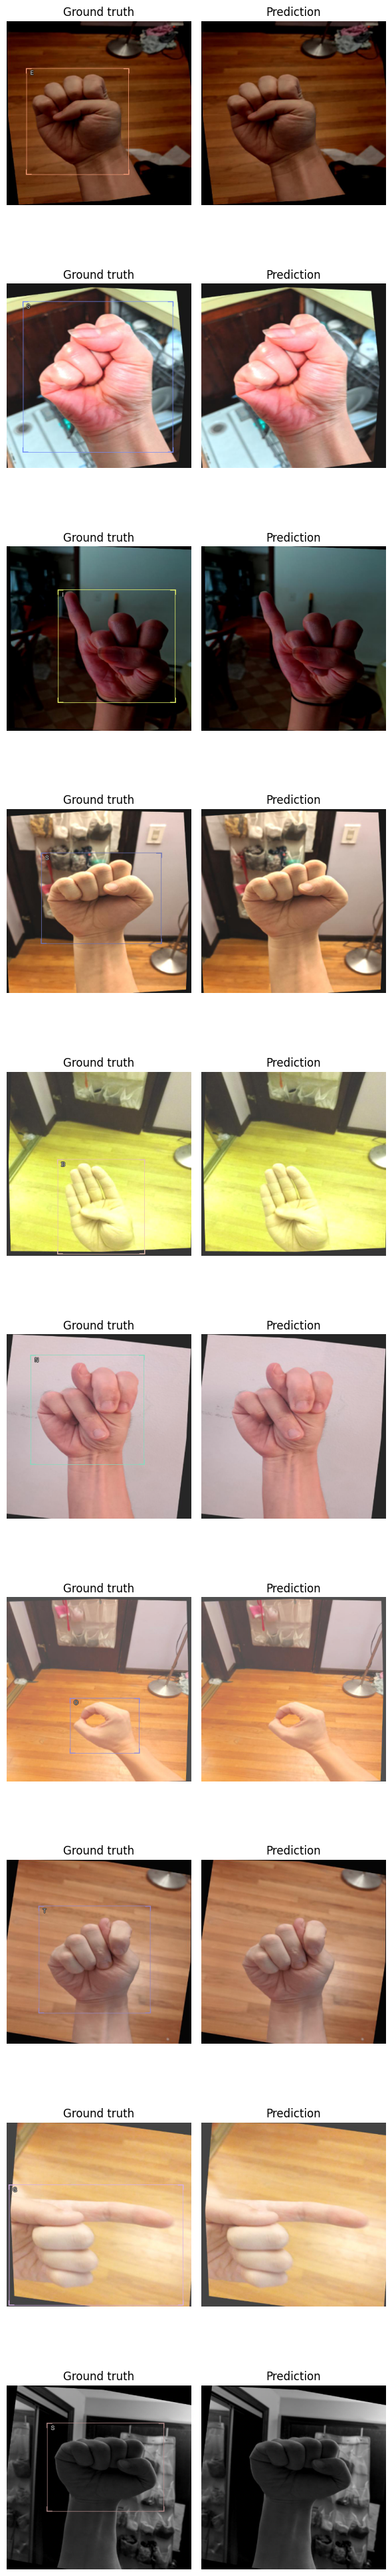

In [ ]:
show_preds(preds=preds[:10])